# <b><u> Project Title : ZOMATO RESTAURANT CLUSTERING AND SENTIMENT ANALYSIS

 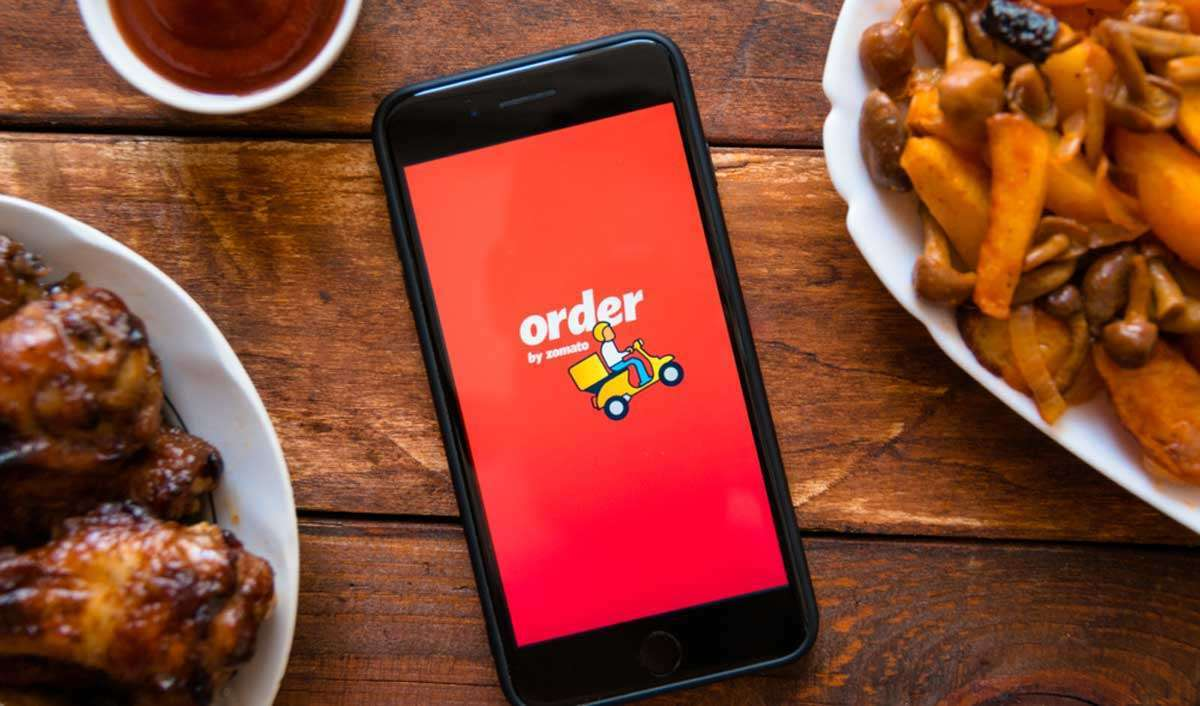

## **About Zomato:-**
Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

##**Reason behind the project :-**
India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

## **Problem Statement:-**

The Project focuses on Customers and Company, you have to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.

In [ ]:
#importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



# **Data Collection**

---



### **Data_1: Zomato Restaurant names and Metadata**

In [ ]:
# loading the csv data_1 to a Pandas DataFrame
df= pd.read_csv('/content/drive/MyDrive/projects/zomato sentiment analysis/Zomato Restaurant names and Metadata.csv')


Gone Use this dataset for clustering part

* Name : Name of Restaurants

* Links : URL Links of Restaurants

* Cost : Per person estimated Cost of dining

* Collection : Tagging of Restaurants w.r.t. Zomato categories

* Cuisines : Cuisines served by Restaurants

* Timings : Restaurant Timings

### **Data_2: Zomato Restaurant reviews**

In [ ]:
# loading the csv data_2 to a Pandas DataFrame
dt=pd.read_csv('/content/drive/MyDrive/projects/zomato sentiment analysis/Zomato Restaurant reviews.csv')

* Restaurant : Name of the Restaurant

* Reviewer : Name of the Reviewer

* Review : Review Text

* Rating : Rating Provided by Reviewer

* MetaData : Reviewer Metadata - No. of Reviews and followers

* Time: Date and Time of Review

* Pictures : No. of pictures posted with review

## **About dataset 1**

In [ ]:
#printing 1st few rows of dataset
df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [ ]:
#printing last 5 five rows of dataset
df.tail(5)

,Name,Links,Cost,Collections,Cuisines,Timings
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)
104,Republic Of Noodles - Lemon Tree Hotel,https://www.zomato.com/hyderabad/republic-of-n...,"1,700",Pan-Asian Delicacies,"Thai, Asian, Chinese, Malaysian","11:30 AM to 3 PM, 7 PM to 12 Midnight"


In [ ]:
#printing shape of dataset
df.shape

(105, 6)

**our dataset 1 contain 105 rows and 6 columns which is not that much great** 

In [ ]:
#understanding some info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


## **About dataset 2**

---


In [ ]:
#printing 1st few rows of dataset
dt.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [ ]:
#printing last 5 five rows of dataset
dt.tail(5)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0
9999,Chinese Pavilion,Bhargava Krishna,Checked in here to try some delicious chinese ...,3.5,"472 Reviews , 1302 Followers",5/31/2016 16:41,6


In [ ]:
#printing shape of dataset
dt.shape

(10000, 7)

**Our dataset 2 contains 10000 rows and 7 columns which is pretty enough for further data processing**

In [ ]:
#understanding some info about the data
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


## **Preprocessing of dataset**

* In Preprocessing of dataset we improve the accuracy of our database. We remove any values that are wrong or missing as a consequence of human error or problems.
* Consistency should be improved. The accuracy of the results is harmed when there are data discrepancies or duplicates.
* Make the database as complete as possible. If necessary, we can fill up the missing properties.
* The data should be smooth. We make it easier to use and interpret this manner.

### **Merging dataset_1 and dataset_2**

In [ ]:
#merging data set 1 and dataset 2 
df=df.merge(dt, left_on='Name', right_on='Restaurant')

In [ ]:
#printing first 5 five rows of dataset 
df.head()

,Name,Links,Cost,Collections,Cuisines,Timings,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


**here we merged datasets df and dt on columns "Name","restuarant" contains common information**

In [ ]:
#deleting column Links 
df.drop(columns=['Links'],inplace=True)

**As it seems useless dropping it will surey help in further data preprocessing**

## **Handeling Missing values**

In [ ]:
#cheaking  for counts of null values 
df.isnull().sum()

Name              0
Cost              0
Collections    5000
Cuisines          0
Timings         100
Restaurant        0
Reviewer         38
Review           45
Rating           38
Metadata         38
Time             38
Pictures          0
dtype: int64

In [ ]:
#droping null values
df=df.dropna()

**Columns:-**
 * **Cost,**
 * **Timing**,
 * **collections** 
 * **Reviewer**,
 * **Review,**
 * **Rating,**
 * **Metadata,**
 * **picture**

  **contains null value in which collections column contain 5000 null values which is more as compare to other null values** 

In [ ]:
#printing uniques of columns Cost 
df['Cost'].unique()

array(['800', '1,300', '1,200', '1,500', '500', '1,000', '350', '400',
       '1,600', '750', '1,900', '450', '1,400', '1,100', '700', '1,700',
       '2,500', '650', '600', '2,800'], dtype=object)

In [ ]:
#Replacing elementing comms(,) from the values 
df['Cost']=df['Cost'].str.replace(',','').astype(int)

In [ ]:
#printing first 5 rows of dataset
df.head(5)

,Name,Cost,Collections,Cuisines,Timings,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [ ]:
#Printing list Names of restuarant 
list(df['Name'].unique())

['Beyond Flavours',
 'Paradise',
 'Flechazo',
 'Shah Ghouse Hotel & Restaurant',
 'Over The Moon Brew Company',
 "The Fisherman's Wharf",
 'eat.fit',
 'Hyper Local',
 'Cream Stone',
 "Sardarji's Chaats & More",
 'Barbeque Nation',
 'Absolute Sizzlers',
 'The Lal Street - Bar Exchange',
 "AB's - Absolute Barbecues",
 '10 Downing Street',
 'Pakwaan Grand',
 '13 Dhaba',
 "Jonathan's Kitchen - Holiday Inn Express & Suites",
 'B-Dubs',
 'SKYHY',
 'Mustang Terrace Lounge',
 "3B's - Buddies, Bar & Barbecue",
 'Pista House',
 'Marsala Food Company',
 'Mazzo - Marriott Executive Apartments',
 'Banana Leaf Multicuisine Restaurant',
 'The Glass Onion',
 'The Foodie Monster Kitchen',
 'La La Land - Bar & Kitchen',
 'Ulavacharu',
 'Shanghai Chef 2',
 'Mathura Vilas',
 'Diners Pavilion',
 'Cafe Eclat',
 'Feast - Sheraton Hyderabad Hotel',
 'Tempteys',
 'PourHouse7',
 'Prism Club & Kitchen',
 'Komatose - Holiday Inn Express & Suites',
 'Yum Yum Tree - The Arabian Food Court',
 'The Tilt Bar Republic'

In [ ]:
#Printing list Collections of restuarant 
list(df['Collections'].unique())

['Food Hygiene Rated Restaurants in Hyderabad, Corporate Favorites, Great Buffets, Top-Rated, Gold Curated, Live Sports Screenings',
 "Hyderabad's Hottest",
 "Great Buffets, Hyderabad's Hottest",
 'Late Night Restaurants',
 "Best Bars & Pubs, Food Hygiene Rated Restaurants in Hyderabad, Top-Rated, Gold Curated, Hyderabad's Hottest",
 "Sunday Brunches, Corporate Favorites, Great Buffets, Hyderabad's Hottest, Food Hygiene Rated Restaurants in Hyderabad, Top-Rated, Gold Curated",
 'Food Hygiene Rated Restaurants in Hyderabad',
 'Great Buffets, Live Sports Screenings, Best Bars & Pubs, Trending This Week',
 'Frozen Delights',
 'Street Food, Veggie Friendly, Pocket Friendly',
 'Barbecue & Grill',
 'Great Buffets',
 'Corporate Favorites, Happy Hours, Live Sports Screenings, Rooftops, Trending This Week',
 "Barbecue & Grill, Great Buffets, Corporate Favorites, Hyderabad's Hottest",
 'Trending This Week',
 'Veggie Friendly',
 'Great Italian, Sunday Brunches',
 'Live Sports Screenings, Gigs and

In [ ]:
#Replacing NAN of column collections to the others
df['Collections'] = df.Collections.apply (lambda x: x if not pd.isnull (x) else 'others')

In [ ]:
#printing uniques of column Cuisines 
list(df['Cuisines'].unique())

['Chinese, Continental, Kebab, European, South Indian, North Indian',
 'Biryani, North Indian, Chinese',
 'Asian, Mediterranean, North Indian, Desserts',
 'Biryani, North Indian, Chinese, Seafood, Beverages',
 'Asian, Continental, North Indian, Chinese, Mediterranean',
 'Seafood, Goan, North Indian, Continental, Asian',
 'Healthy Food, North Indian, Continental, South Indian',
 'American, Chinese, North Indian, Kebab, South Indian',
 'Ice Cream, Desserts',
 'Street Food, North Indian, Fast Food',
 'Mediterranean, North Indian, Kebab, BBQ',
 'Continental, American, Chinese',
 'North Indian, Italian, Finger Food',
 'European, Mediterranean, North Indian',
 'North Indian, Chinese, Continental',
 'North Indian, Chinese, Biryani',
 'North Indian',
 'North Indian, Japanese, Italian, Salad, Sushi',
 'American',
 'Mexican, Italian, North Indian, Chinese, Salad',
 'North Indian, Mediterranean, European',
 'Bakery, North Indian, Mughlai, Juices, Chinese',
 'Arabian, North Indian, Chinese',
 'Ita

In [ ]:
#deleting columns Restaurant,Timings,Reviewer
df=df.drop(columns=['Restaurant','Timings','Reviewer'])

In [ ]:
#printing uniques of column Rating 
df['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5'], dtype=object)

In [ ]:
#printing value counts of column Rating 
df['Rating'].value_counts()

5      2116
4      1241
1       715
3       546
2       291
4.5      31
3.5      11
2.5       8
1.5       3
Name: Rating, dtype: int64

In [ ]:
#replaceing Like in column Rating as '5' which is most repeated value in the column
df['Rating']=df['Rating'].str.replace('Like','5' )

In [ ]:
#printing uniques of column Rating 
df['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5'], dtype=object)

In [ ]:
#Filling null values with average number 3 
df.fillna(value =3,inplace = True)
 
# Show the DataFrame
print(df['Rating'].unique())

['5' '4' '1' '3' '2' '3.5' '4.5' '2.5' '1.5']


In [ ]:
#changing datatype of column Rating as float
df['Rating']=df['Rating'].astype(float)

In [ ]:
#Printing 1st 5 rows of dataset
df.head(5)

,Name,Cost,Collections,Cuisines,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...",Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...",A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...",Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...",Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [ ]:
#extraction only numbers of reviews from the column metadata
df['Metadata']=df['Metadata'].str.split(' ').str.get(0)

In [ ]:
#changing column name metadata as No_of_reviews
df.rename(columns={'Metadata':'No_of_reviews'},inplace=True)

In [ ]:
#Changing data type as float of column No_of_reviews
df['No_of_reviews']=df['No_of_reviews'].astype(float)

In [ ]:
#carrying out date from the Time column string
df['Time']=df['Time'].str.split(' ').str.get(0)

In [ ]:
#converting column to the date time column 
df['Time']=pd.to_datetime(df['Time'])

In [ ]:
#Extracting year,month,hour,day from column time
df['Year']=df['Time'].dt.year
df['month']=df['Time'].dt.month_name()
df['hour'] = df['Time'].dt.hour
df['day'] = df['Time'].dt.day_name()


**Here we are Extracting year,month by Name ,hour,day by name  from column time so we can use them for further exploratory data analysis**

In [ ]:
#Printing 1st 5 rows of dataset
df.head()

,Name,Cost,Collections,Cuisines,Review,Rating,No_of_reviews,Time,Pictures,Year,month,hour,day
0,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","The ambience was good, food was quite good . h...",5.0,1.0,2019-05-25,0,2019,May,0,Saturday
1,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...",Ambience is too good for a pleasant evening. S...,5.0,3.0,2019-05-25,0,2019,May,0,Saturday
2,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...",A must try.. great food great ambience. Thnx f...,5.0,2.0,2019-05-24,0,2019,May,0,Friday
3,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...",Soumen das and Arun was a great guy. Only beca...,5.0,1.0,2019-05-24,0,2019,May,0,Friday
4,Beyond Flavours,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...",Food is good.we ordered Kodi drumsticks and ba...,5.0,3.0,2019-05-24,0,2019,May,0,Friday


In [ ]:
#ddroping column Time from the dataset
New_df=df.drop(columns=['Time'])

In [ ]:
#asigning 6-100 as Morning ,12-17 as Afternoon,18-5 as evening 
def time_type(hour):
  if(hour==6 or hour==7 or hour==8 or hour==9 or hour==10 or hour==11):
    return 'Morning'
  elif(hour==12 or hour==13 or hour==14 or hour==15 or hour==16 or hour==17):
    return 'Afternoon'
  else:
    return 'Evening'

In [ ]:
#applying time type function the column hour
New_df['Time_type']=New_df['hour'].apply(time_type)

In [ ]:
#droping column hour  
New_df.drop(columns=['hour'],inplace=True)

## **Exploratory Data Analysis**

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

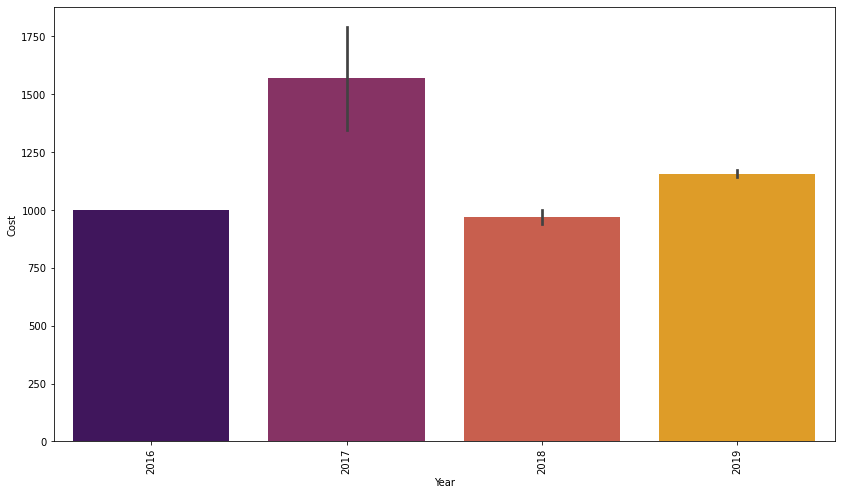

In [ ]:
#plotting bar plot for calculating Per person estimated Cost of dining for each year
plt.figure(figsize = (14, 8))
sns.barplot(x = 'Year', y = 'Cost', data = New_df, palette = 'inferno')
plt.xticks(rotation=90)

**From the above bar plot you can see that Per person estimated Cost of dining in 2017 is more than all the other years and  Cost of dining is less in 2018 as compare to other years**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

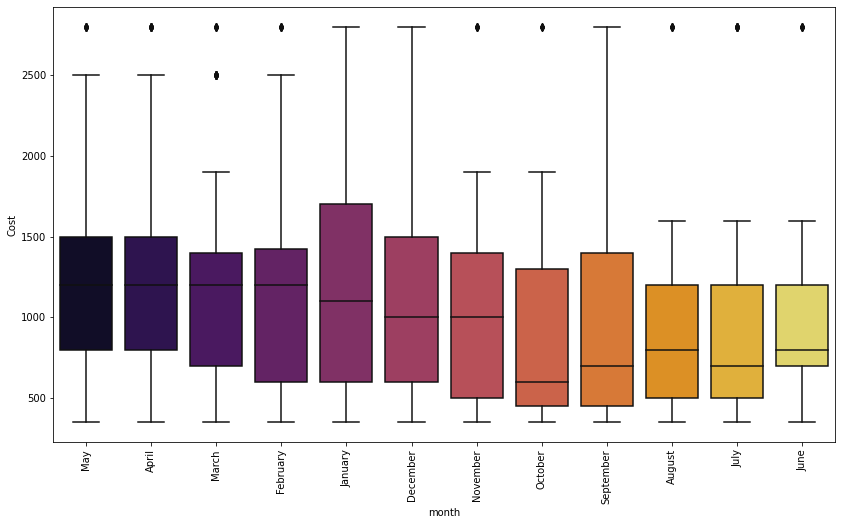

In [ ]:
#plotting box plot for calculating Cost Per person for each month 
plt.figure(figsize = (14, 8))
sns.boxplot(x = 'month', y = 'Cost', data = New_df, palette = 'inferno')
plt.xticks(rotation=90)

**Cost per person is high avg.750RS in january and very low avg. 600RS in july,New year can be a reson behind it for high cost** 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

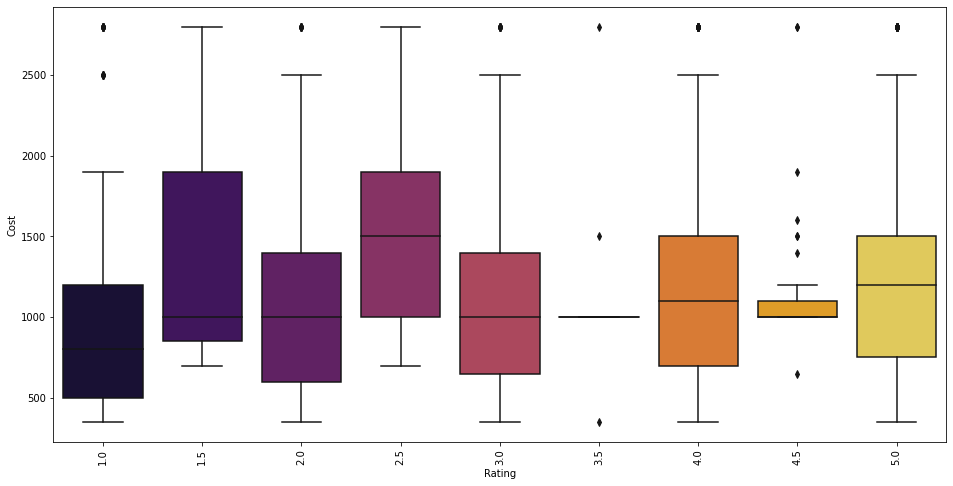

In [ ]:
#plotting box plot for understanding the impact of cost on ratings
plt.figure(figsize = (16,8))
sns.boxplot(x="Rating", y="Cost",data = New_df, palette = 'inferno')
plt.xticks(rotation = 90)

**here you can observe that as cost per person  is more rating about 5/5**

**example:- restuarant which are showing price per person more than 2000RS showing rating 5 quality of food and tasty food might be reson for their high per person cost**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

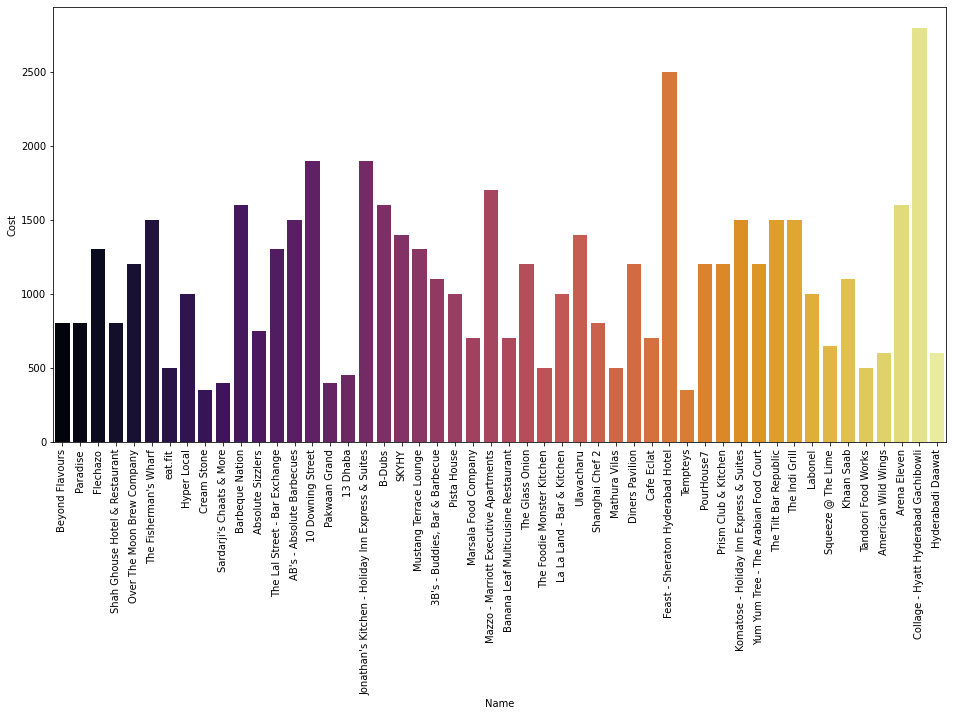

In [ ]:
#Ploting bar plot for uderstanding the cost of per person of each hotel 
plt.figure(figsize = (16,8))
sns.barplot(x="Name", y="Cost",data = New_df, palette = 'inferno')
plt.xticks(rotation = 90)

**From the above analysis we can find that 'collage-Hyatt Hydrabad Gachibowli' and 'Feast sheraton hydrabad hotel are most expensive hotel whose cost per person is more than 2500rs**

**Mohmmedian shawarma ,momos delight,KS bakers,Amul are cheapest hotels**

In [ ]:
#creating data frame of cuisines which are showing most number of reviews
Cuisines_No_of_reviews_df= New_df[['Cuisines', 'No_of_reviews']]
Cuisines_No_of_reviews_df = New_df.groupby(['Cuisines'])['No_of_reviews'].sum()
Cuisines_No_of_reviews_df = Cuisines_No_of_reviews_df.to_frame()
Cuisines_No_of_reviews_df = Cuisines_No_of_reviews_df.sort_values('No_of_reviews', ascending=False)
Cuisines_No_of_reviews_df

,No_of_reviews
Cuisines,
"Bakery, Desserts",6628.0
"North Indian, Chinese, Continental",5818.0
"Bakery, North Indian, Mughlai, Juices, Chinese",5429.0
"Continental, Italian, North Indian, Chinese, Asian",4764.0
"Hyderabadi, Chinese, Mughlai",4412.0
"North Indian, Continental, Italian",4377.0
"Desserts, Beverages",3593.0
"Cafe, Bakery",3558.0
"Mediterranean, North Indian, Kebab, BBQ",3470.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text major ticklabel objects>)

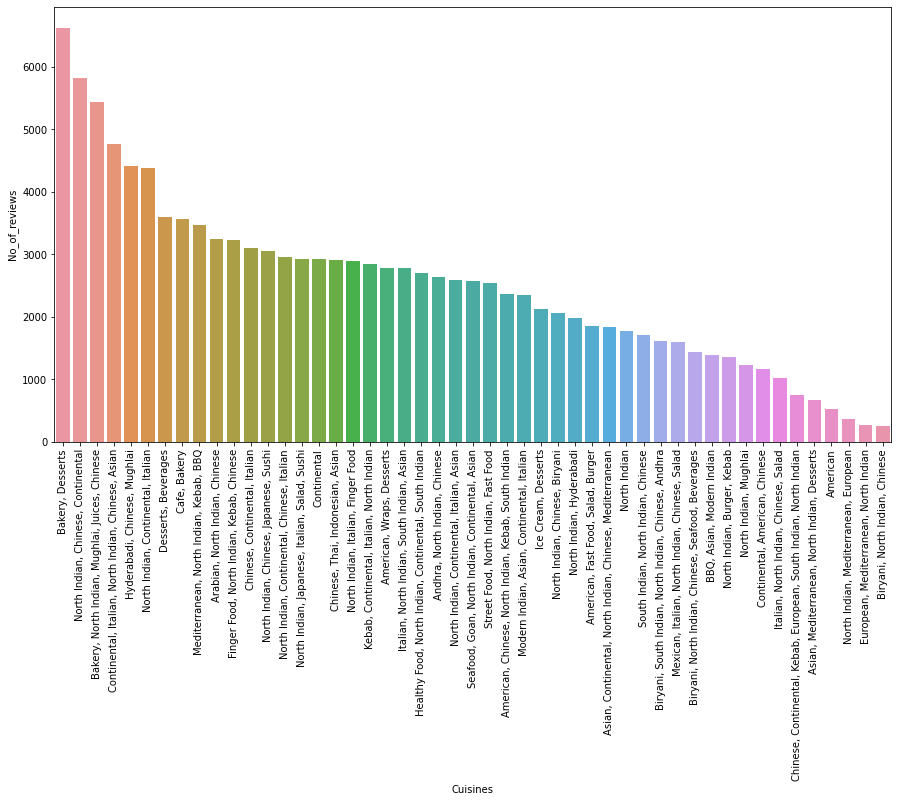

In [ ]:
#Ploting bar plot for estimating  count reviews for each Cuisines 
plt.figure(figsize = (15,8))
sns.barplot(Cuisines_No_of_reviews_df.index , Cuisines_No_of_reviews_df['No_of_reviews'])
plt.xticks(rotation = 90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text major ticklabel objects>)

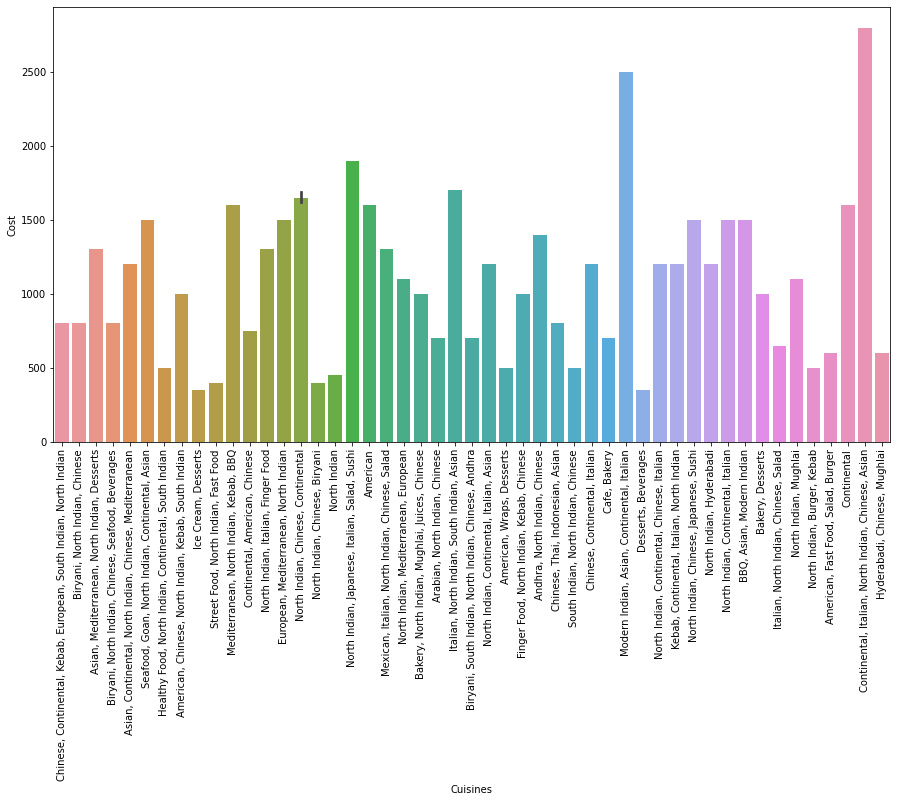

In [ ]:
#Ploting bar plot for identifying Cost of per person for each Cuisines 
plt.figure(figsize = (15,8))
sns.barplot( New_df['Cuisines'], New_df['Cost'])
plt.xticks(rotation = 90)

In [ ]:
#Creating dataframe for Cuisines which are having highest numbers of Ratings
Cuisines_Rating_df= New_df[['Cuisines', 'Rating']]
Cuisines_Rating_df = New_df.groupby(['Cuisines'])['Rating'].sum()
Cuisines_Rating_df = Cuisines_Rating_df.to_frame()
Cuisines_Rating_df = Cuisines_Rating_df.sort_values('Rating', ascending=False)
Cuisines_Rating_df.head()

,Rating
Cuisines,
"North Indian, Chinese, Continental",717.0
"European, Mediterranean, North Indian",488.0
American,481.0
"North Indian, Mediterranean, European",476.0
"Biryani, North Indian, Chinese",470.0


**Table shows North indian and chinese showing total rating 1334**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]),
 <a list of 49 Text major ticklabel objects>)

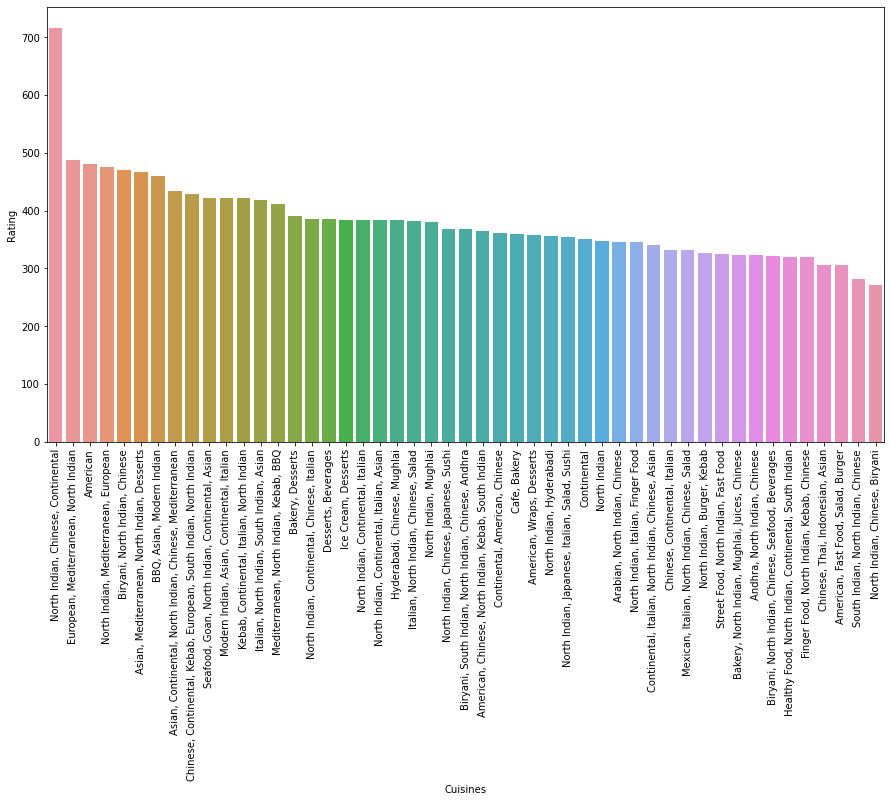

In [ ]:
#plotiing bar plot for understanding Ratings for diff. Cuisines
plt.figure(figsize = (15,8))
sns.barplot(Cuisines_Rating_df.index , Cuisines_Rating_df['Rating'])
plt.xticks(rotation = 90)

**Above Bar Graph shows peopleare  prefering posting ratings regardings**
* **North** 
* **indian**
* **chinees**
* **deserts**
* **ice-cream**
* **Biryani**

 **over other cuisines**

In [ ]:
#printing the value counts of column Pictures
New_df['Pictures'].value_counts()

0     3837
1      383
2      207
3      136
4       71
6       57
7       53
5       51
8       42
9       25
10      25
15      10
11       6
14       6
12       5
20       4
17       4
19       4
27       4
13       4
18       4
16       4
22       3
26       2
42       2
28       2
21       2
25       2
52       1
37       1
24       1
64       1
34       1
23       1
32       1
Name: Pictures, dtype: int64

**Many of the restuarants shows posted pics which are less than 40
Asigning them as 10**

In [ ]:
#Asigning pictures posted below 40 as 10
Pictures = New_df['Pictures'].value_counts(ascending = False)
Pictures_less_than_thirtyfive = Pictures[Pictures<40]
def pictures_count(value):
    if(value in Pictures_less_than_thirtyfive):
        return "10"
    else:
        return value
New_df['Pictures'] = New_df['Pictures'].apply(pictures_count)
New_df['Pictures'].value_counts()

0     3837
1      383
2      207
3      136
10     125
4       71
6       57
7       53
5       51
8       42
Name: Pictures, dtype: int64

In [ ]:
#changing datatype of column as int
New_df['Pictures'] = New_df['Pictures'].astype(int)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


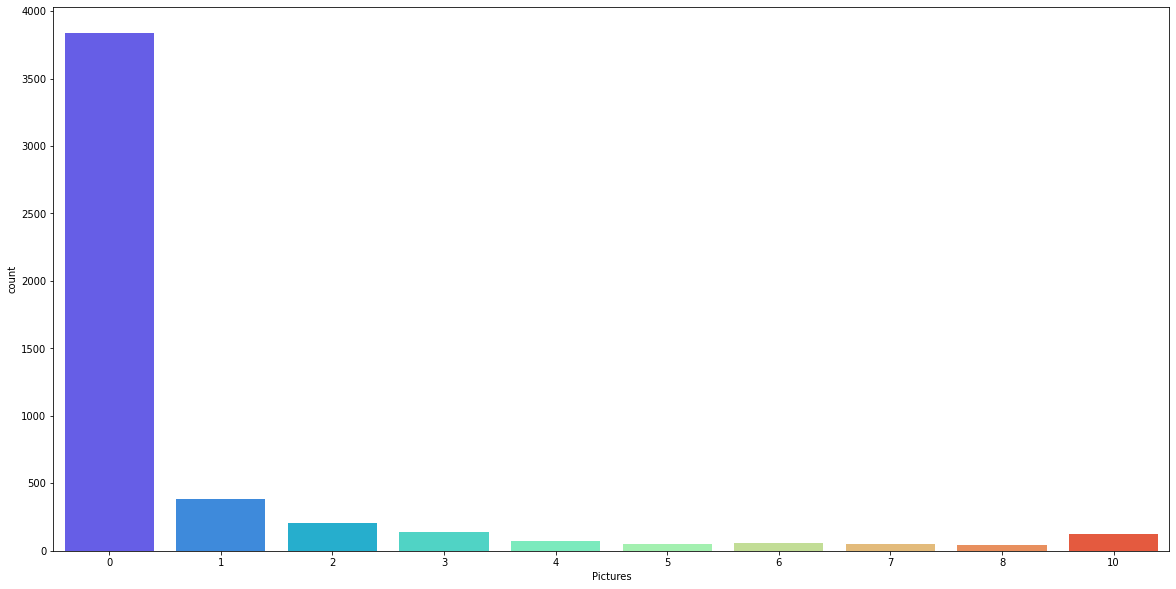

In [ ]:
#ploting bar plot for counting the pictures count
plt.figure(figsize = (20,10))
sns.countplot(New_df['Pictures'], palette = 'rainbow')

**Most of the Customers avoid  posting pictures with reviews**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

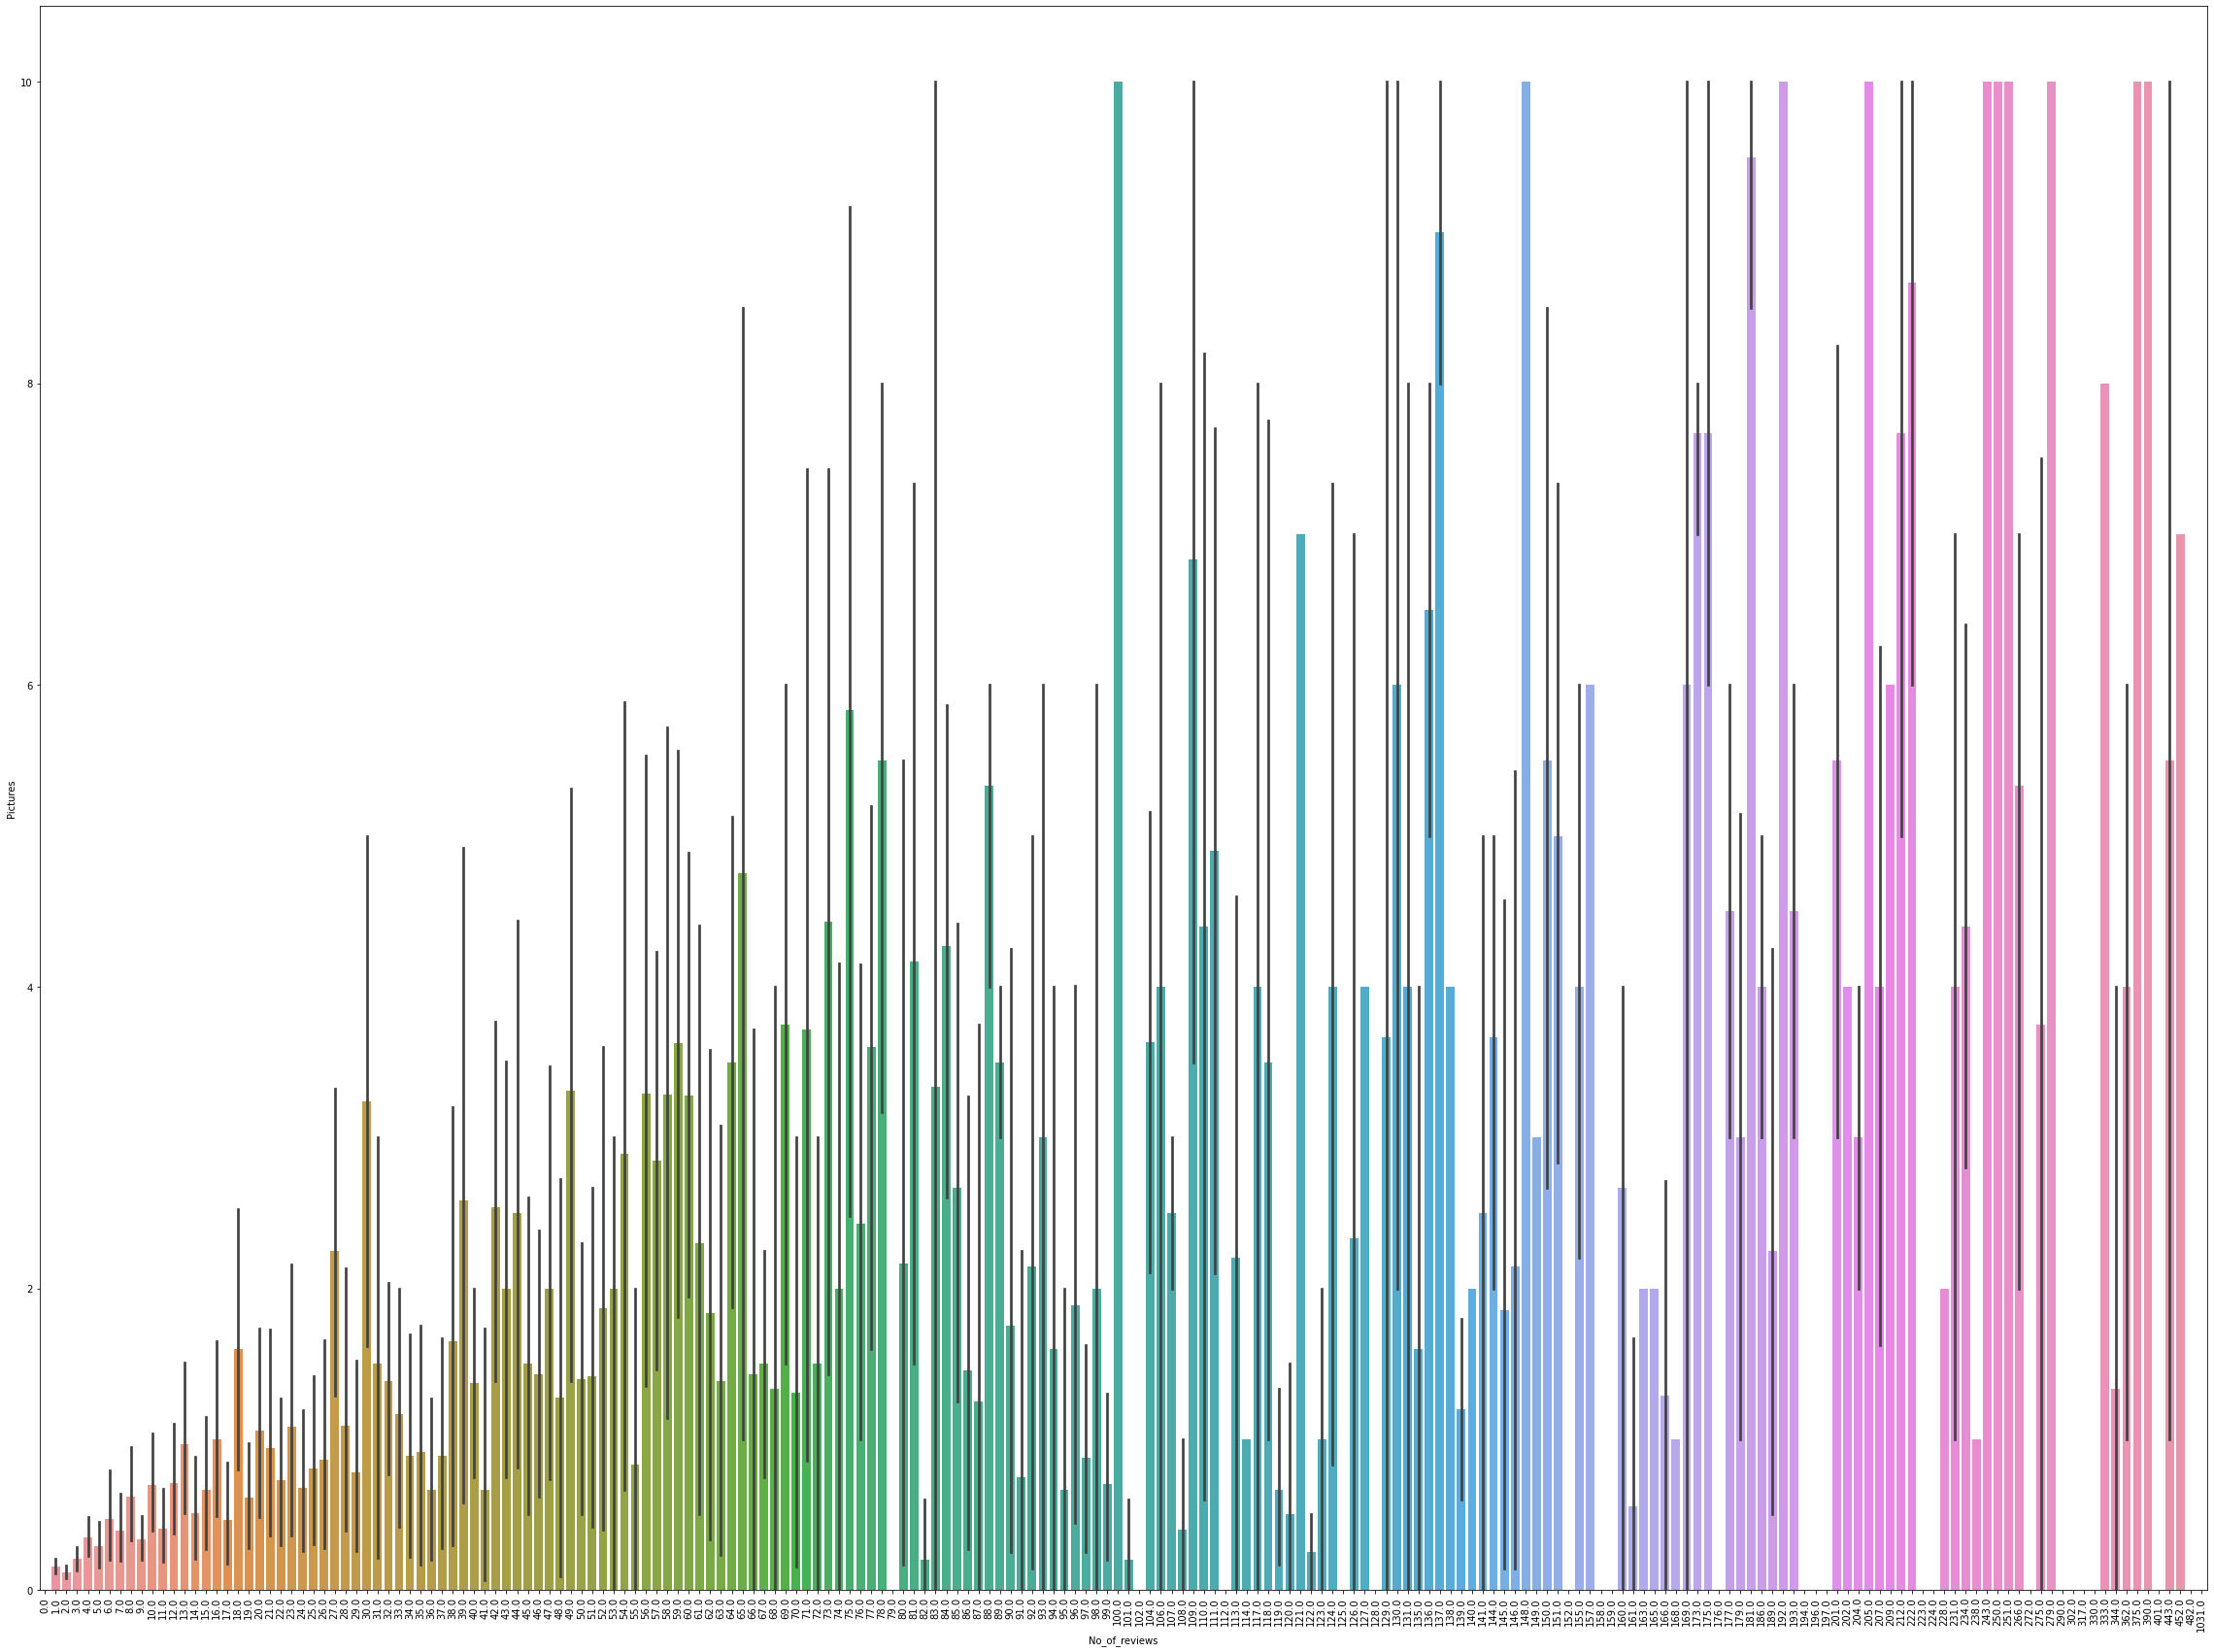

In [ ]:
#ploting bar plot for counting no. of pictures for No_of_reviews
plt.figure(figsize = (40,30))
sns.barplot(New_df['No_of_reviews'],New_df['Pictures'])
plt.xticks(rotation=90)

**Here you can see as number of reviews are more no of picturs posted are also more**

**Double click on Bar Graph for better experince**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

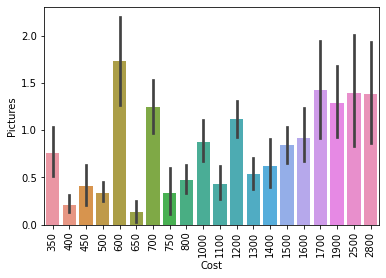

In [ ]:
#plotting bar graph for understanding the impact of cost on pictures
sns.barplot(New_df['Cost'],New_df['Pictures'])
plt.xticks(rotation=90)

**here you can see as cost is high pictures posted by people are also more**

**people are loving to post pictures when cost for restuarant is high as they getting good and quality food**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5]),
 <a list of 11 Text major ticklabel objects>)

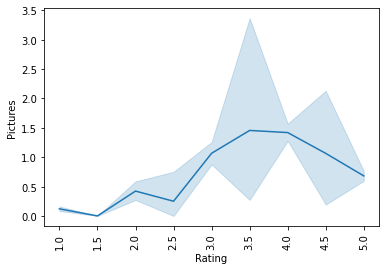

In [ ]:
#plotting line plot for uderstanding impact of pictures on rating
sns.lineplot(New_df['Rating'],New_df['Pictures'])
plt.xticks(rotation=90)

 **Here you can see that as no.of picture are more than 2 ratings is near 3 and 4**

**As no.of picture are less rating is also low**

In [ ]:
#printing unique no of reviews
New_df['No_of_reviews'].unique()

array([1.000e+00, 3.000e+00, 2.000e+00, 4.000e+00, 3.000e+01, 6.000e+00,
       7.200e+01, 8.000e+00, 9.000e+00, 5.000e+00, 1.500e+02, 6.100e+01,
       7.000e+00, 2.500e+01, 4.700e+01, 5.100e+01, 2.000e+01, 1.300e+01,
       1.200e+01, 1.600e+01, 1.800e+01, 0.000e+00, 4.500e+01, 1.500e+01,
       7.600e+01, 5.600e+01, 4.600e+01, 5.000e+01, 1.100e+01, 7.000e+01,
       6.000e+01, 1.400e+01, 1.000e+01, 2.200e+01, 1.140e+02, 3.100e+01,
       1.970e+02, 2.800e+01, 1.900e+01, 6.500e+01, 1.700e+01, 3.600e+01,
       2.700e+01, 3.200e+01, 1.630e+02, 8.600e+01, 2.900e+01, 3.900e+01,
       1.070e+02, 4.400e+01, 1.690e+02, 3.300e+01, 6.900e+01, 2.300e+01,
       1.610e+02, 6.300e+01, 2.400e+01, 1.220e+02, 9.900e+01, 5.500e+01,
       1.510e+02, 2.070e+02, 1.200e+02, 4.200e+01, 5.200e+01, 3.400e+01,
       3.800e+01, 3.440e+02, 9.700e+01, 3.500e+01, 4.900e+01, 6.200e+01,
       1.600e+02, 1.960e+02, 8.100e+01, 1.310e+02, 2.100e+01, 5.900e+01,
       7.800e+01, 1.660e+02, 1.090e+02, 9.800e+01, 

In [ ]:
#printing value counts of number of reviews
No_of_reviews = New_df['No_of_reviews'].value_counts(ascending = False)
print(No_of_reviews)

1.0      1247
2.0       550
3.0       348
4.0       230
5.0       180
         ... 
128.0       1
112.0       1
290.0       1
452.0       1
209.0       1
Name: No_of_reviews, Length: 202, dtype: int64


**for restuarants those who recived more than 10 reviews, creating special row for more than 10 reviews as 11 reviews**

In [ ]:
No_of_reviews = New_df['No_of_reviews'].value_counts(ascending = False)
No_of_reviews_morethanseven = No_of_reviews[No_of_reviews<170]
def handle_cuisines(value):
    if(value in No_of_reviews_morethanseven):
        return "11"
    else:
        return value
New_df['No_of_reviews'] = New_df['No_of_reviews'].apply(handle_cuisines)
New_df['No_of_reviews'].value_counts()

11     2407
1.0    1247
2.0     550
3.0     348
4.0     230
5.0     180
Name: No_of_reviews, dtype: int64

**3831 restuarants shows they recived more than 10 reviews**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


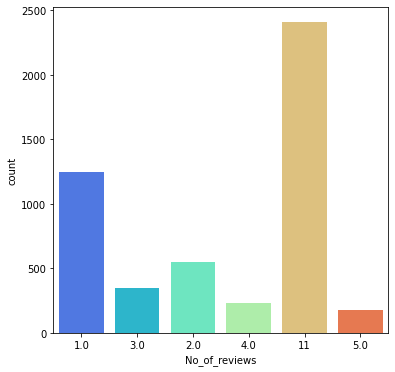

In [ ]:
#ploting count plot for estimating count of No_of_reviews
plt.figure(figsize = (6,6))
sns.countplot(New_df['No_of_reviews'], palette = 'rainbow')

**Most of the restuarants shows No of reviews they received are more than 11**

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

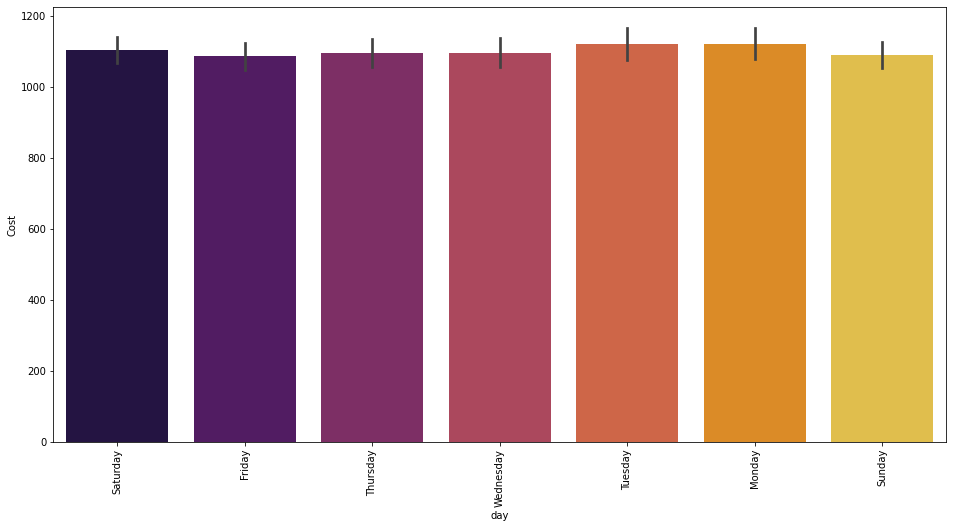

In [ ]:
#plotting bar plot for understanding cost of dishes on each day
plt.figure(figsize = (16,8))
sns.barplot(x="day", y="Cost",data = New_df, palette = 'inferno')
plt.xticks(rotation = 90)

**Above bar plot shows cost per person on wednesday is more. we can call it expensive day of the week**

([0, 1, 2, 3, 4, 5, 6], <a list of 7 Text major ticklabel objects>)

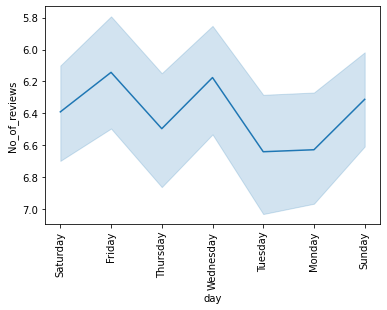

In [ ]:
#plotting line plot to identify no_reviews posted on each day
sns.lineplot(x="day", y="No_of_reviews",data = New_df, palette = 'inferno')
plt.xticks(rotation = 90)

**Number of reviews given on friday are camparatively more**

 **that means most people prefer visiting restaurants posting reviews on friday**

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

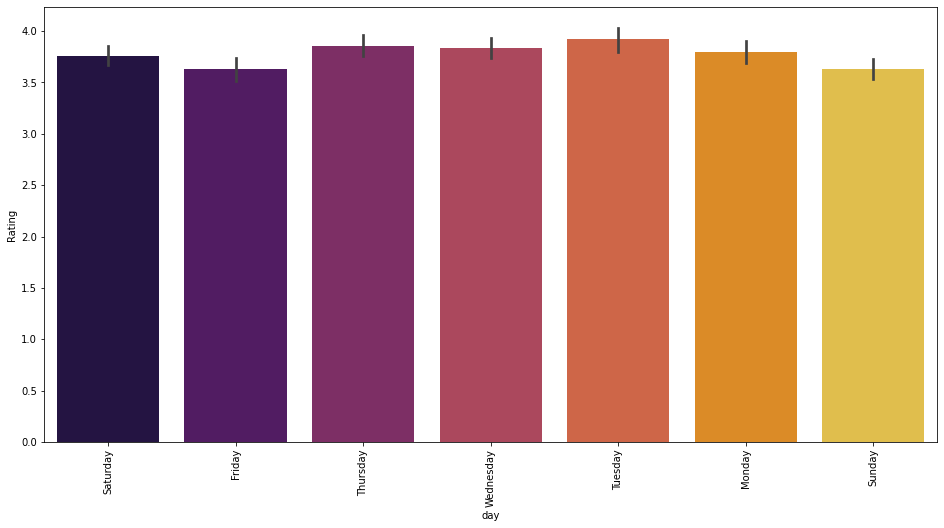

In [ ]:
#plotting barplot for understanding no.of Ratings posted in a day
plt.figure(figsize = (16,8))
sns.barplot(x="day", y="Rating",data = New_df, palette = 'inferno')
plt.xticks(rotation = 90)

**from this barplot,we can observe that more number Ratings are given on Thursday**

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

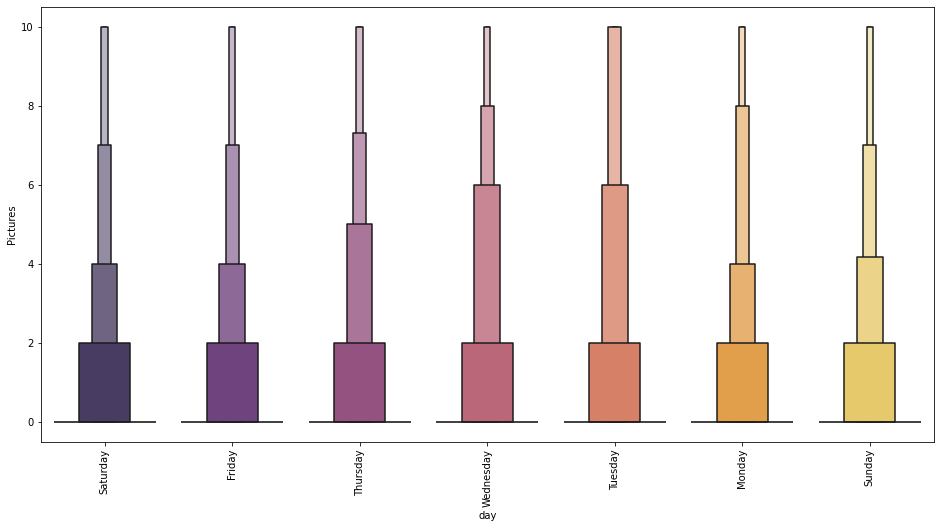

In [ ]:
#plotting boxenplot for understanding no.of picture posted in a day
plt.figure(figsize = (16,8))
sns.boxenplot(x="day", y="Pictures",data = New_df, palette = 'inferno')
plt.xticks(rotation = 90)

**Above Graph shows that number of pictures uploaded on every day is approx.same**

### **Name of Cheapest Restaurants**

In [ ]:
#printing lowest cost from the column Cost
New_df['Cost'].min()

350

In [ ]:
#printing name of most Cheapest Restaurants in the city
df_cp=New_df[New_df['Cost']==150]['Name']
df_cp.unique()

array([], dtype=object)

**Most Cheapest Restaurants of the city are 
<u> Amul & Mohammedia Shawarma**

### **Name of Expensive Restaurants**

In [ ]:
#printing max cost from the column max
New_df['Cost'].max()

2800

In [ ]:
#printing name of most Expensive Restaurants in the city
df_Ep=New_df[New_df['Cost']==2800]['Name']
df_Ep.unique()

array(['Collage - Hyatt Hyderabad Gachibowli'], dtype=object)

**Most Expensive Restaurants of the city is <u>Collage - Hyatt Hyderabad Gachibowli**

In [ ]:
New_df['sentiment'] = New_df['Rating'].apply(lambda Rating : 1 if Rating > 3 else 0)

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
New_df_k=New_df[['Cost','Rating','No_of_reviews','Pictures']]
New_df_k.head()

,Cost,Rating,No_of_reviews,Pictures
0,800,5.0,1.0,0
1,800,5.0,3.0,0
2,800,5.0,2.0,0
3,800,5.0,1.0,0
4,800,5.0,3.0,0


In [ ]:
#divideing data into dependent(y) and independent(X) variables
y = New_df_k['Cost']
X = New_df_k.drop(['Cost'], axis = 1)

## **K-Means Clustering**
Clustering is one of the most common exploratory data analysis technique used to get an intuition about the structure of the data. It can be defined as the task of identifying subgroups in the data such that data points in the same subgroup (cluster) are very similar while data points in different clusters are very different. In other words, we try to find homogeneous subgroups within the data such that data points in each cluster are as similar as possible according to a similarity measure such as euclidean-based distance or correlation-based distance. The decision of which similarity measure to use is application-specific.

Kmeans algorithm is an iterative algorithm that tries to partition the dataset into Kpre-defined distinct non-overlapping subgroups (clusters) where each data point belongs to only one group. It tries to make the intra-cluster data points as similar as possible while also keeping the clusters as different (far) as possible. It assigns data points to a cluster such that the sum of the squared distance between the data points and the cluster’s centroid (arithmetic mean of all the data points that belong to that cluster) is at the minimum. The less variation we have within clusters, the more homogeneous (similar) the data points are within the same cluster.

The way kmeans algorithm works is as follows:

* Specify number of clusters K.

* Initialize centroids by first shuffling the dataset and then randomly selecting K data points for the centroids without replacement.

* Keep iterating until there is no change to the centroids. i.e assignment of data points to clusters isn’t changing.

* Compute the sum of the squared distance between data points and all centroids..

* Assign each data point to the closest cluster (centroid)..

.Compute the centroids for the clusters by taking the average of the all data points that belong to each cluster..

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [ ]:
# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

## **Applying elbow method**


---


* As we know we have to decide the value of k. But for deciding the value of k Elbow Method can help us to find the best value of k. 

* It uses the sum of squared distance (SSE) between the data points and their respective assigned clusters centroid or says mean value. And We pick k value at where the point SSE starts to flatten out and forming an elbow. 

* This is how the method helps to find the good value of k (number of clusters for the dataset) and help in making the good clusters for the given dataset.

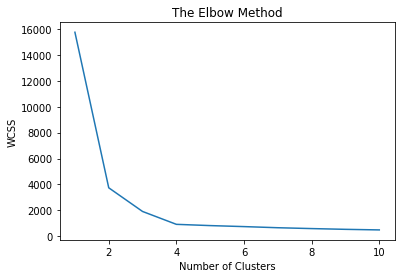

In [ ]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
clusterer = KMeans(n_clusters=4, random_state=10)
cluster_labels = clusterer.fit_predict(X)
print(cluster_labels)

[2 2 3 1 0 1 0 0 0 0 2 2 0 1 0 2 0 2 1 0 3 3 0 1 0 0 1 1 3 0 2 1 0 2 0 2 3
 3 2 3 0 3 1 0 0 2 3 0 1 1 1 3 3 0 2 3 3 3 3 0 1 1 3 0 1 0 2 0 3 3 2 3 0 2
 0 0 2 0 0 3 1 1 3 1 1 3 3 1 3 3 1 2 3 0 1 2 2 0 2 1 1 2 1 3 1 0 0 1 1 3 0
 2 1 3 1 3 1 0 1 0 3 2 2 3 0 3 1 2 2 0 1 3 3 3 3 2 1 0 1 1 0 2 0 1 1 1 0 0
 2 2 3 3 1 2 1 3 3 3 3 3 3 3 3 3 1 2 2 2 0 1 2 3 0 2 1 3 3 3 3 2 0 3 1 2 2
 3 0 2 2 0 1 1 2 2 0 1 0 2 2 1 2 3 1 0 0 2 0 3 2 0 3 0 3 2 0 0 0 1 3 1 0 2
 3 0 3 3 3 1 3 1 2 3 2 3 1 1 3 2 1 2 0 3 2 2 2 2 0 3 2 3 0 1 1 0 0 1 3 0 3
 1 0 1 3 3 1 0 2 2 3 3 3 0 1 1 0 1 3 2 1 2 1 2 2 1 2 1 1 0 3 3 3 0 0 3 2 1
 2 2 2 0 3 0 2 3 2 2 3 2 2 3 1 2 0 0 1 1 3 2 1 1 0 2 1 1 0 3 1 3 0 2 2 1 3
 2 0 1 1 0 0 0 2 0 1 1 3 1 1 1 1 2 2 0 1 3 0 2 1 3 1 0 1 3 0 3 1 0 0 2 1 2
 2 2 2 2 2 3 2 1 2 1 1 3 1 0 3 3 2 1 3 1 0 2 3 3 2 3 3 1 1 2 3 0 1 0 0 2 2
 0 2 3 3 2 3 2 3 1 2 1 3 0 1 3 0 1 2 0 1 1 3 0 3 0 2 1 2 0 1 2 2 2 3 1 0 2
 0 0 3 3 2 0 0 0 0 0 0 2 0 3 2 0 1 0 1 0 3 3 1 1 1 3 0 3 2 3 1 0 2 1 2 1 2
 0 1 1 2 3 0 2 3 3 3 2 0 

### **Calculation of Silhouette score**


---


Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. To calculate the Silhouette score for each observation/data point, the following distances need to be found out for each observations belonging to all the clusters:

Mean distance between the observation and all other data points in the same cluster. This distance can also be called a mean intra-cluster distance. The mean distance is denoted by a.
Mean distance between the observation and all other data points of the next nearest cluster. This distance can also be called a mean nearest-cluster distance. The mean distance is denoted by b.

The Silhouette Coefficient for a sample is 

**Silhouette score = (a − b) / m a x (a, b)**
.

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


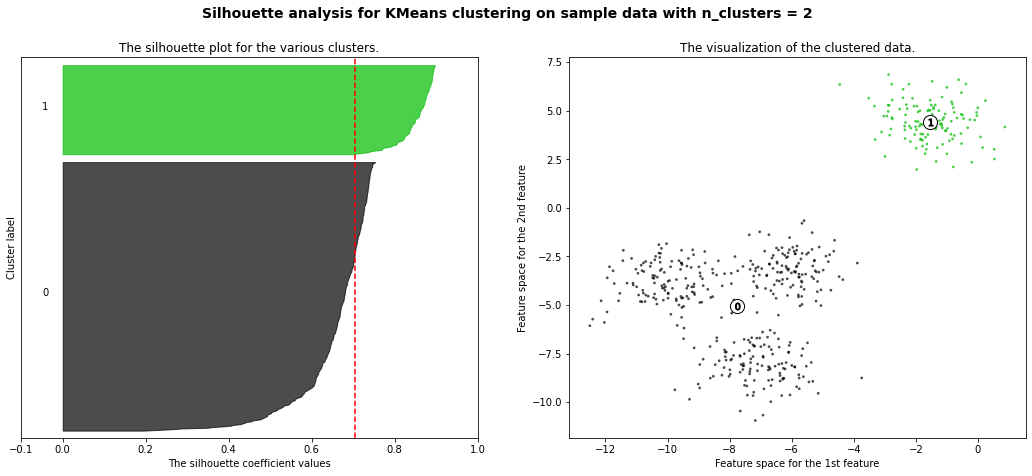

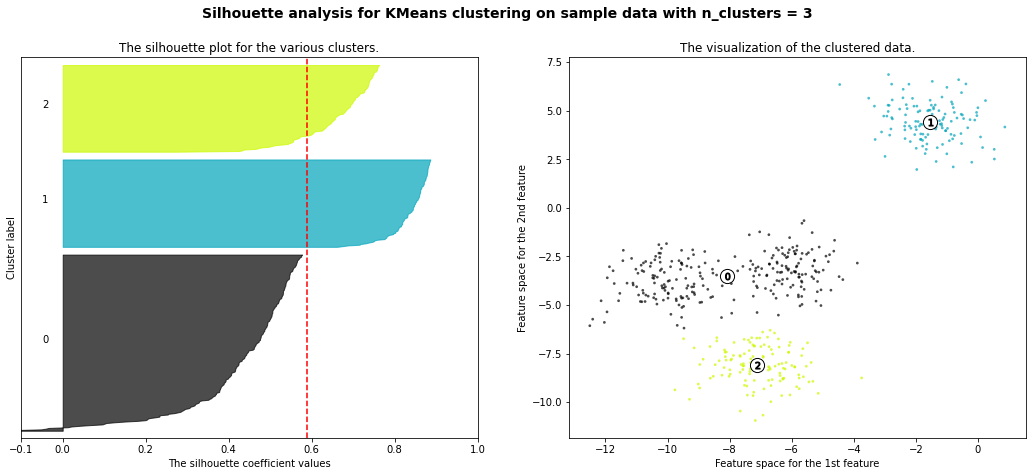

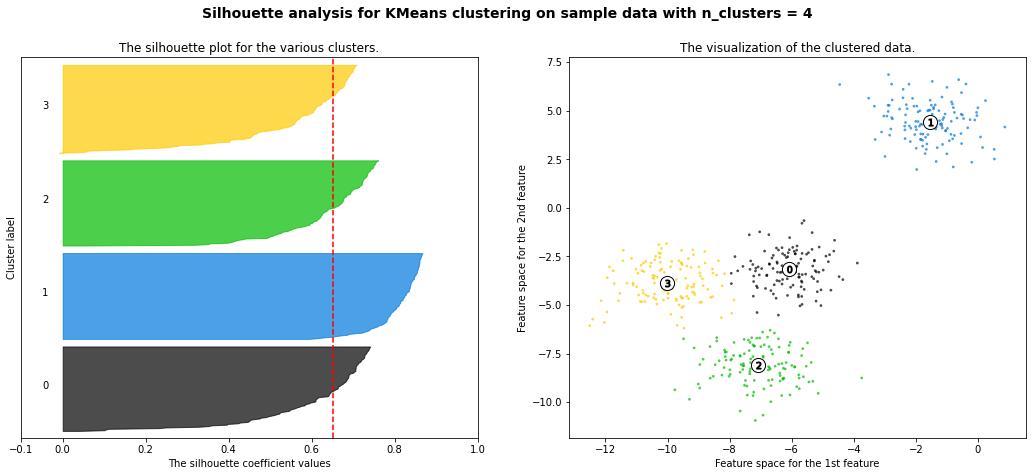

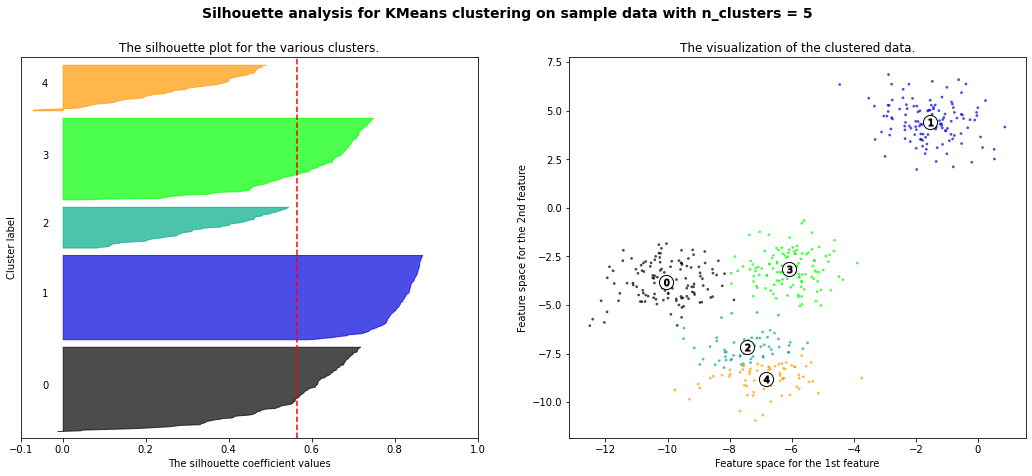

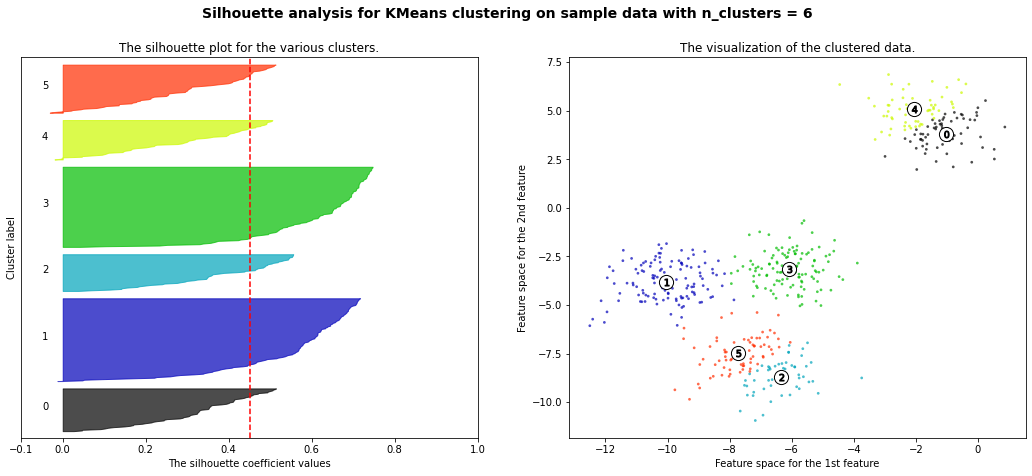

In [ ]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

**Range of Silhouette Value –**

Now, obviously Silhouette Value will lie between [-1, 1] –

* If silhouette value is close to 1, sample is well-clustered and already assigned to a very appropriate cluster.

*  If silhouette value is about to 0, sample could be assign to another cluster closest to it and the sample lies equally far away from both the clusters. That means it indicates overlapping clusters

* If silhouette value is close to –1, sample is misclassified and is merely placed somewhere in between the clusters.

**For 2 clusters silhouette_score is : 0.70 which is preety good!,**

**And for 4 clusters silhouette_score is : 0.65**

### **Dendrogram diagram**


---


A Dendrogram is a diagram that represents relationship between objects. The Dendrogram is used to display the distance between each pair of sequentially merged objects. 
These are commonly used in studying clusters before deciding the number of clusters significant to the dataset. The distance at which the two clusters combine is referred to as the dendrogram distance. The primary use of a dendrogram is to work out the best way to allocate objects to clusters. The key point to interpreting or implementing a dendrogram is to focus on the closest objects in the dataset. 
Note:- 

* Distance between data points represents dissimilarities.
* Height of the blocks represents the distance between clusters.

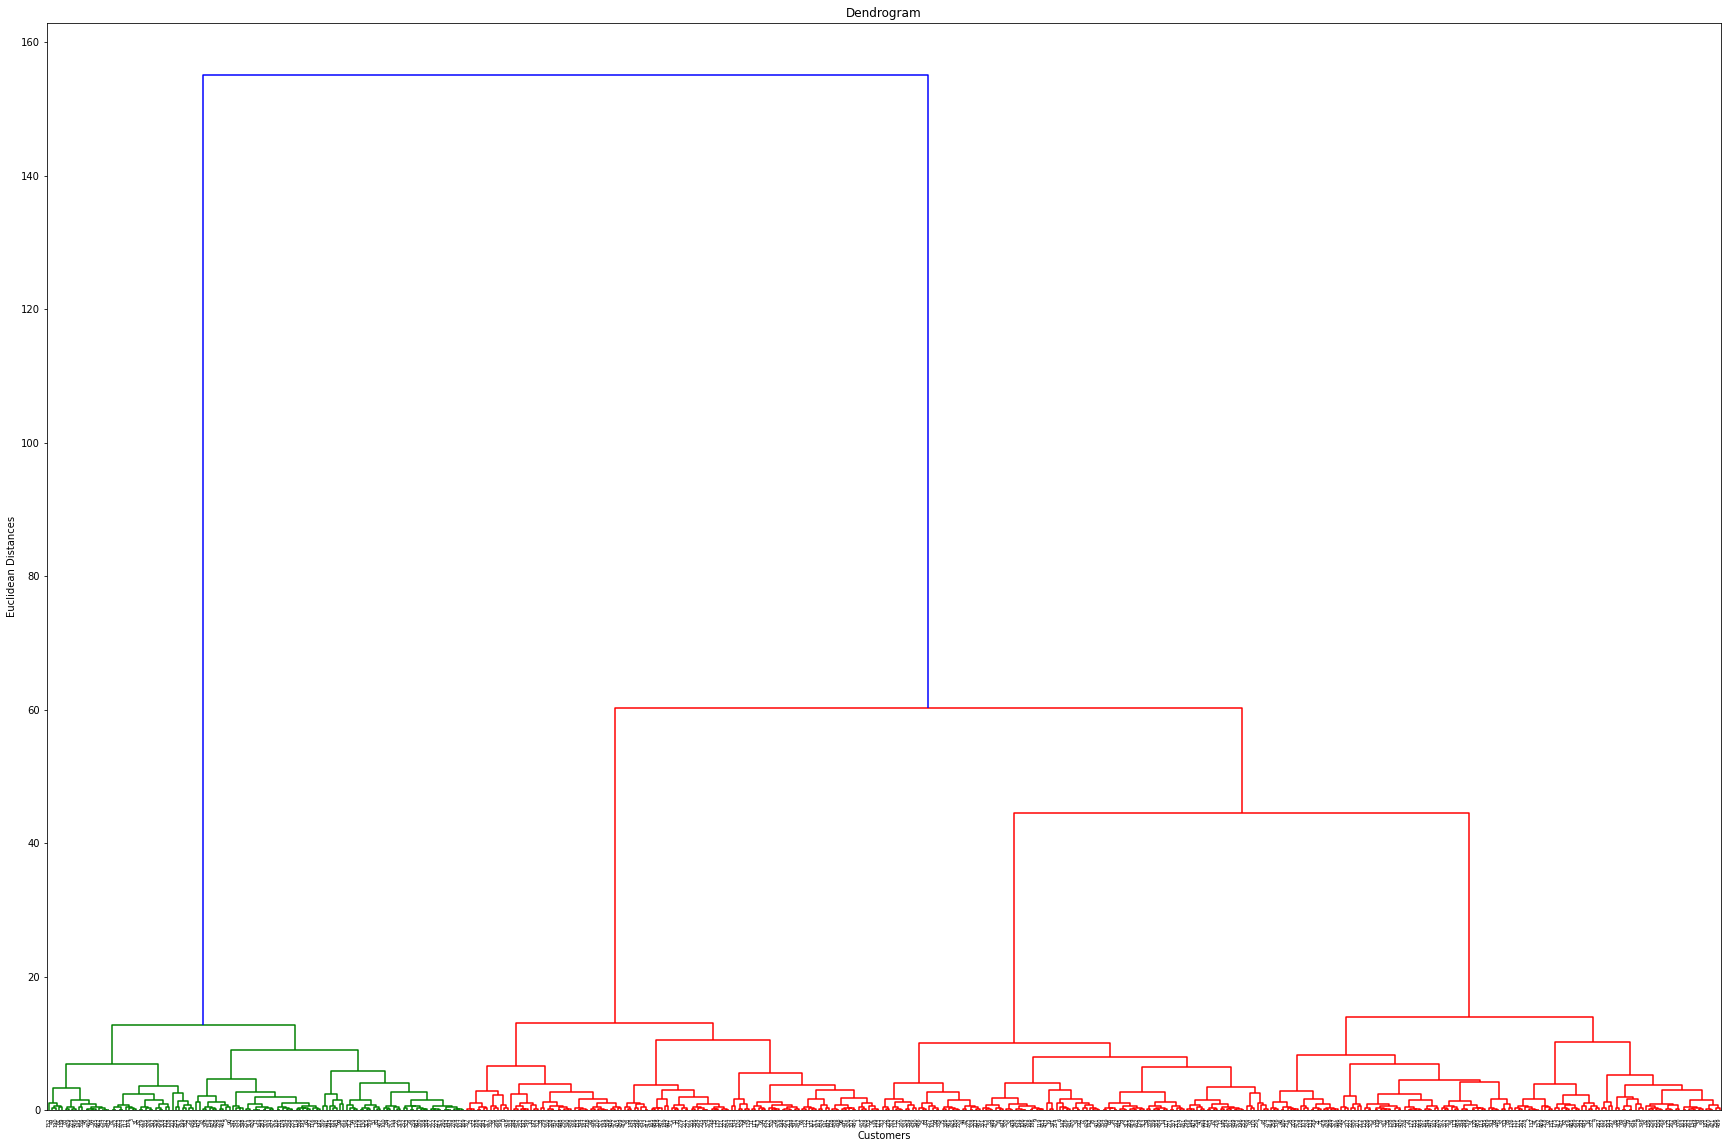

In [ ]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(30,20))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show() 
# find largest vertical distance we can make without crossing any other horizontal line

* **The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold=90**

* **No. of Cluster = 2**

In [ ]:
#Creating list of review as paragraph 
paragraph=list(New_df['Review'].unique())
paragraph

In [ ]:
#importing required packages 
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:
#downloading package of stopword 
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#downloading package of wordnet 
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
#Asigning PorterStemmer,WordNetLemmatizer as ps and wordnet
ps = PorterStemmer()
wordnet=WordNetLemmatizer()
corpus = []

In [ ]:
# Replacing Linebreaks with Space
def line_breaks(paragraph):
    paragraph = paragraph.replace('\\r', ' ')
    paragraph = paragraph.replace('\\"', ' ')
    paragraph = paragraph.replace('\n', ' ')
    return paragraph

In [ ]:
#lowering the words in paragraph and removeing the stop words from the paragraph 
for i in range(len(paragraph)):
    review = re.sub('[^a-zA-Z]', ' ', paragraph[i])
    review = review.lower()
    review = review.split()
    review = [wordnet.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
#printing clean reviews corpus
corpus

Most common words in review


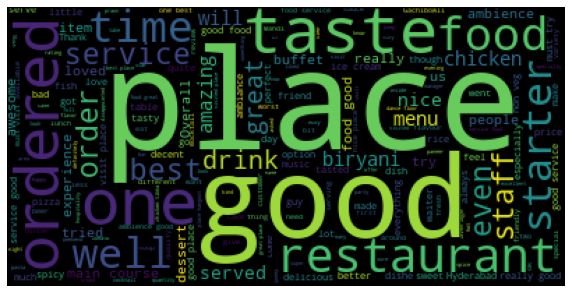

In [ ]:
#importing required packages 
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

#printing most common words in reviews 
print('Most common words in review')
plt.figure( figsize=(10,10) )
wc=WordCloud().generate(' '.join(New_df['Review']))
plt.imshow(wc)
plt.axis('off')
plt.show()

## **TFIDF Vectorizer**

---



TF-IDF (term frequency-inverse document frequency) is a statistical measure that evaluates how relevant a word is to a document in a collection of documents.

This is done by multiplying two metrics: how many times a word appears in a document, and the inverse document frequency of the word across a set of documents.

It has many uses, most importantly in automated text analysis, and is very useful for scoring words in machine learning algorithms for Natural Language Processing (NLP).

TF-IDF was invented for document search and information retrieval. It works by increasing proportionally to the number of times a word appears in a document, but is offset by the number of documents that contain the word. So, words that are common in every document, such as this, what, and if, rank low even though they may appear many times, since they don’t mean much to that document in particular.

In [ ]:
#creating dependent and independant variables 
X = New_df['Review']
y=New_df['sentiment']

In [ ]:
#Splitting the Data into Training data & Test Data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=5)

In [ ]:
#printing count of y_train 
y_train.value_counts()

1    2719
0    1250
Name: sentiment, dtype: int64

In [ ]:
#printing count of y_test
y_test.value_counts()

1    680
0    313
Name: sentiment, dtype: int64

In [ ]:
#importing required packages 
from sklearn.feature_extraction.text import  TfidfVectorizer
vectorizer = TfidfVectorizer()

In [ ]:
#fitting vectorizer on X_train and X_test
x_train_tfidf= vectorizer.fit_transform(X_train)
x_test_tfidf=vectorizer.transform(X_test)

In [ ]:
#converting datapoints to array 
train_array= x_train_tfidf.toarray()
test_array = x_test_tfidf.toarray()

In [ ]:
#creating data frame of array 
tfidf_df=pd.DataFrame(train_array,columns=vectorizer.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [ ]:
#printing dataset 
tfidf_df

## **MultinomialNB**

In [ ]:
#importing required packages 
from sklearn.naive_bayes import MultinomialNB
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

# training the model on X_train and Y_train  
model = MultinomialNB()
model.fit(train_array,y_train)

#printing y_pred for train and test dataset 
y_train_preds = model.predict(train_array)
y_test_preds = model.predict(test_array)

#printing precision ,recall ,f1-score, support for train and test dataset
print(classification_report(y_train,y_train_preds))
print("\n")
print(classification_report(y_test,y_test_preds))


              precision    recall  f1-score   support

           0       0.99      0.44      0.61      1250
           1       0.80      1.00      0.89      2719

    accuracy                           0.82      3969
   macro avg       0.89      0.72      0.75      3969
weighted avg       0.86      0.82      0.80      3969



              precision    recall  f1-score   support

           0       1.00      0.31      0.47       313
           1       0.76      1.00      0.86       680

    accuracy                           0.78       993
   macro avg       0.88      0.65      0.67       993
weighted avg       0.83      0.78      0.74       993



In [ ]:
#printing roc and auc score for trainig and test dataset
print('roc_auc_score for train set : ',roc_auc_score(y_train,y_train_preds))
print('roc_auc_score for test set : ',roc_auc_score(y_test,y_test_preds))

roc_auc_score for train set :  0.721664435454211
roc_auc_score for test set :  0.6549520766773163


## **LogisticRegression**

In [ ]:
#importing required packages 
from sklearn.linear_model import LogisticRegression

In [ ]:
# training the model on X_train and Y_train 
clf = LogisticRegression(max_iter=1000)
clf.fit(train_array,y_train)

LogisticRegression(max_iter=1000)

In [ ]:
#printing y_pred for train and test dataset 
Y_train_preds = clf.predict(train_array)
Y_test_preds = clf.predict(test_array)

In [ ]:
#printing precision ,recall ,f1-score, support for train and test dataset
print(classification_report(y_train,Y_train_preds))
print("\n")
print(classification_report(y_test,Y_test_preds))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      1250
           1       0.93      0.98      0.95      2719

    accuracy                           0.93      3969
   macro avg       0.94      0.90      0.92      3969
weighted avg       0.94      0.93      0.93      3969



              precision    recall  f1-score   support

           0       0.91      0.78      0.84       313
           1       0.90      0.96      0.93       680

    accuracy                           0.90       993
   macro avg       0.91      0.87      0.88       993
weighted avg       0.90      0.90      0.90       993



In [ ]:
#printing roc and auc score for trainig and test dataset
print('roc_auc_score for train set : ',roc_auc_score(y_train,Y_train_preds))
print('roc_auc_score for test set : ',roc_auc_score(y_test,Y_test_preds))

roc_auc_score for train set :  0.9049571165869805
roc_auc_score for test set :  0.8697965607968428


## **DecisionTreeClassifier**

In [ ]:
#importing required packages 
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [ ]:
#setting up the best parameters for the model
classifier = DecisionTreeClassifier(criterion='gini')
tuned_parameters = {"max_depth": [3, 5, 7, 9, 11, 13], "max_leaf_nodes": [19, 21, 23, 25]}
classifier = GridSearchCV(classifier,
                   tuned_parameters,
                   cv=5,
                   scoring='accuracy')
classifier.fit(train_array,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 11, 13],
                         'max_leaf_nodes': [19, 21, 23, 25]},
             scoring='accuracy')

In [ ]:
#identifying best parameters for the model 
classifier.best_params_

{'max_depth': 5, 'max_leaf_nodes': 23}

In [ ]:
# training the model on X_train and Y_train 
classifier = DecisionTreeClassifier(max_depth=13, max_leaf_nodes= 21)
classifier.fit(train_array,y_train)

DecisionTreeClassifier(max_depth=13, max_leaf_nodes=21)

In [ ]:
#printing y_pred for train and test dataset 
Y_train_preds = classifier.predict(train_array)
Y_test_preds = classifier.predict(test_array)

In [ ]:
#printing precision ,recall ,f1-score, support for train and test dataset
print(classification_report(y_train,Y_train_preds))
print("\n")
print(classification_report(y_test,Y_test_preds))

              precision    recall  f1-score   support

           0       0.81      0.66      0.73      1250
           1       0.86      0.93      0.89      2719

    accuracy                           0.85      3969
   macro avg       0.83      0.80      0.81      3969
weighted avg       0.84      0.85      0.84      3969



              precision    recall  f1-score   support

           0       0.78      0.63      0.70       313
           1       0.84      0.92      0.88       680

    accuracy                           0.83       993
   macro avg       0.81      0.78      0.79       993
weighted avg       0.83      0.83      0.82       993



In [ ]:
#printing roc and auc score for trainig and test dataset
print('roc_auc_score for train set : ',roc_auc_score(y_train,Y_train_preds))
print('roc_auc_score for test set : ',roc_auc_score(y_test,Y_test_preds))

roc_auc_score for train set :  0.7956767929385804
roc_auc_score for test set :  0.7758527532418718


## **RandomForestClassifier**

In [ ]:
#importing required packages 
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#setting up the best parameters for the model
grid_values = {'max_leaf_nodes':[21,35,45,50,75,100,300], 'max_depth':[3,7, 9, 11, 13]}
classifier_RFC = RandomForestClassifier(random_state=0)
classifier_RFC = GridSearchCV(classifier, param_grid= grid_values, scoring = 'accuracy', cv=5)
classifier_RFC.fit(train_array,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=13, max_leaf_nodes=21),
             param_grid={'max_depth': [3, 7, 9, 11, 13],
                         'max_leaf_nodes': [21, 35, 45, 50, 75, 100, 300]},
             scoring='accuracy')

In [ ]:
#identifying best parameters for the model 
classifier_RFC.best_params_

{'max_depth': 9, 'max_leaf_nodes': 35}

In [ ]:
# training the model on X_train and Y_train 
classifier_RFC = RandomForestClassifier()
classifier_RFC.fit(train_array,y_train)

RandomForestClassifier()

In [ ]:
#printing y_pred for train and test dataset 
y_train_preds = classifier_RFC.predict(train_array)
y_test_preds = classifier_RFC.predict(test_array)

In [ ]:
#printing precision ,recall ,f1-score, support for train and test dataset
print(classification_report(y_train,y_train_preds))
print("\n")
print(classification_report(y_test,y_test_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1250
           1       1.00      1.00      1.00      2719

    accuracy                           1.00      3969
   macro avg       1.00      1.00      1.00      3969
weighted avg       1.00      1.00      1.00      3969



              precision    recall  f1-score   support

           0       0.93      0.69      0.79       313
           1       0.87      0.97      0.92       680

    accuracy                           0.89       993
   macro avg       0.90      0.83      0.86       993
weighted avg       0.89      0.89      0.88       993



In [ ]:
#printing roc and auc score for trainig and test dataset
print('roc_auc_score for train set : ',roc_auc_score(y_train,y_train_preds))
print('roc_auc_score for test set : ',roc_auc_score(y_test,y_test_preds))

roc_auc_score for train set :  0.9992
roc_auc_score for test set :  0.8325479233226838


# **Bag Of Words**


---


A bag-of-words model, or BOW for short, is a way of extracting features from text for use in modeling, such as with machine learning algorithms.

The approach is very simple and flexible, and can be used in a myriad of ways for extracting features from documents.

A bag-of-words is a representation of text that describes the occurrence of words within a document. It involves two things:

* A vocabulary of known words.
* A measure of the presence of known words.

It is called a “bag” of words, because any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document

In [ ]:
#importing required packages 
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [ ]:
#fitting vectorizer on X_train and X_test
x_train= cv.fit_transform(X_train)
x_test=cv.transform(X_test)

In [ ]:
#converting datapoints to array 
train_array= x_train.toarray()
test_array = x_test.toarray()

In [ ]:
#creating data frame of array 
bag_of_words=pd.DataFrame(train_array,columns=cv.get_feature_names())

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [ ]:
#printing bag of words dataframe
bag_of_words.head()

,00,00pm,07pm,10,100,1000,10000,100ml,100s,10am,10d,10downing,10gms,10k,10min,10mins,10pcs,10pm,10th,11,110,1125,1127326452,11pm,12,120,1200,129,12am,12pm,13,130,1300,13tb,13th,14,140,1400,145,145rs,...,yu,yuck,yukkkkkkk,yum,yumilicious,yumm,yummieee,yummiest,yumminess,yummm,yummmm,yummmmm,yummmmmm,yummmmmmm,yummy,yummyy,yums,yuuum,yyt,zaffrani,zafrani,zain,zainsabri,zakir,zamir,zen,zero,zeroed,zest,zesty,zing,zomato,zomatoand,zomatto,zomoto,zone,zoomato,zucchini,ànd,éclat
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## **MultinomialNB**

In [ ]:
# training the model on X_train and Y_train 
model = MultinomialNB()
model.fit(train_array,y_train)

#printing y_pred for train and test dataset 
train_preds = model.predict(train_array)
test_preds = model.predict(test_array)

#printing precision ,recall ,f1-score, support for train and test dataset
print(classification_report(y_train,train_preds))
print("\n")
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       0.91      0.85      0.88      1250
           1       0.93      0.96      0.95      2719

    accuracy                           0.93      3969
   macro avg       0.92      0.91      0.91      3969
weighted avg       0.93      0.93      0.93      3969



              precision    recall  f1-score   support

           0       0.88      0.82      0.85       313
           1       0.92      0.95      0.93       680

    accuracy                           0.91       993
   macro avg       0.90      0.88      0.89       993
weighted avg       0.91      0.91      0.91       993



In [ ]:
#printing roc and auc score for trainig and test dataset
print('roc_auc_score for train set : ',roc_auc_score(y_train,train_preds))
print('roc_auc_score for test set : ',roc_auc_score(y_test,test_preds))

roc_auc_score for train set :  0.9072108863552777
roc_auc_score for test set :  0.8824750986656643


## **LogisticRegression**

In [ ]:
# training the model on X_train and Y_train 
clf = LogisticRegression(fit_intercept=True, max_iter=10000)
clf.fit(train_array,y_train)

#printing y_pred for train and test dataset 
train_preds = clf.predict(train_array)
test_preds = clf.predict(test_array)

#printing precision ,recall ,f1-score, support for train and test dataset
print(classification_report(y_train,train_preds))
print("\n")
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1250
           1       0.99      0.99      0.99      2719

    accuracy                           0.99      3969
   macro avg       0.99      0.99      0.99      3969
weighted avg       0.99      0.99      0.99      3969



              precision    recall  f1-score   support

           0       0.85      0.85      0.85       313
           1       0.93      0.93      0.93       680

    accuracy                           0.91       993
   macro avg       0.89      0.89      0.89       993
weighted avg       0.91      0.91      0.91       993



In [ ]:
#printing roc and auc score for trainig and test dataset
print('roc_auc_score for train set : ',roc_auc_score(y_train,train_preds))
print('roc_auc_score for test set : ',roc_auc_score(y_test,test_preds))

roc_auc_score for train set :  0.988225524089739
roc_auc_score for test set :  0.8894991542943056


## **DecisionTreeClassifier**

In [ ]:
#setting up the best parameters for the model
classifier = DecisionTreeClassifier(criterion='gini')
tuned_parameters = {"max_depth": [3, 5, 7, 9, 11, 13], "max_leaf_nodes": [19, 21, 23, 25]}
classifier = GridSearchCV(classifier,
                   tuned_parameters,
                   cv=5,
                   scoring='accuracy')
classifier.fit(train_array,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7, 9, 11, 13],
                         'max_leaf_nodes': [19, 21, 23, 25]},
             scoring='accuracy')

In [ ]:
#identifying best parameters for the model 
classifier.best_params_

{'max_depth': 13, 'max_leaf_nodes': 25}

In [ ]:
# training the model on X_train and Y_train 
classifier = DecisionTreeClassifier(max_depth=13, max_leaf_nodes= 23)
classifier.fit(train_array,y_train)

DecisionTreeClassifier(max_depth=13, max_leaf_nodes=23)

In [ ]:
#printing y_pred for train and test dataset 
train_preds = classifier.predict(train_array)
test_preds = classifier.predict(test_array)

#printing precision ,recall ,f1-score, support for train and test dataset
print(classification_report(y_train,train_preds))
print("\n")
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       0.83      0.65      0.72      1250
           1       0.85      0.94      0.89      2719

    accuracy                           0.85      3969
   macro avg       0.84      0.79      0.81      3969
weighted avg       0.84      0.85      0.84      3969



              precision    recall  f1-score   support

           0       0.79      0.62      0.70       313
           1       0.84      0.93      0.88       680

    accuracy                           0.83       993
   macro avg       0.82      0.77      0.79       993
weighted avg       0.83      0.83      0.82       993



In [ ]:
#printing roc and auc score for trainig and test dataset
print('roc_auc_score for train set : ',roc_auc_score(y_train,train_preds))
print('roc_auc_score for test set : ',roc_auc_score(y_test,test_preds))

roc_auc_score for train set :  0.7917546156675248
roc_auc_score for test set :  0.7740015974440895


## **RandomForestClassifier**

In [ ]:
#setting up the best parameters for the model
grid_values = {'max_leaf_nodes':[21,35,45,50,75,100,300], 'max_depth':[3,7, 9, 11, 13]}
classifier = RandomForestClassifier(random_state=0)
classifier = GridSearchCV(classifier, param_grid= grid_values, scoring = 'accuracy', cv=5)

classifier.fit(train_array,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 7, 9, 11, 13],
                         'max_leaf_nodes': [21, 35, 45, 50, 75, 100, 300]},
             scoring='accuracy')

In [ ]:
#identifying best parameters for the model 
classifier.best_params_

{'max_depth': 13, 'max_leaf_nodes': 300}

In [ ]:
# training the model on X_train and Y_train 
classifier = RandomForestClassifier(max_depth=13, n_estimators=300)
classifier.fit(train_array,y_train)

RandomForestClassifier(max_depth=13, n_estimators=300)

In [ ]:
#printing y_pred for train and test dataset 
train_preds = classifier.predict(train_array)
test_preds = classifier.predict(test_array)

#printing precision ,recall ,f1-score, support for train and test dataset
print(classification_report(y_train,train_preds))
print("\n")
print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50      1250
           1       0.77      1.00      0.87      2719

    accuracy                           0.79      3969
   macro avg       0.88      0.67      0.68      3969
weighted avg       0.84      0.79      0.75      3969



              precision    recall  f1-score   support

           0       0.94      0.16      0.28       313
           1       0.72      1.00      0.84       680

    accuracy                           0.73       993
   macro avg       0.83      0.58      0.56       993
weighted avg       0.79      0.73      0.66       993



In [ ]:
#printing roc and auc score for trainig and test dataset
print('roc_auc_score for train set : ',roc_auc_score(y_train,train_preds))
print('roc_auc_score for test set : ',roc_auc_score(y_test,test_preds))

roc_auc_score for train set :  0.6659999999999999
roc_auc_score for test set :  0.5792637662093592


## **Conclusion :**

We could collecte our two datasets from almabetter platform,we merged datasets on common columns 'name' and 'restuarant' and created new dataset as df. more than half of values from the collection column were missing, we have'nt removed all values, instead of removing NULL value we tried to fill values by others.in preprocessing we removed unwanted columns and moved to Exploratory data analysis where we found
* **Per person estimated Cost of dining in 2017 was too high so it was expensive year** 

* **Cost per person was high avg.750RS in january and very low avg. 600RS in july**

* **collage-Hyatt Hydrabad Gachibowli' and 'Feast sheraton hydrabad hotel are 
most expensive hotel**

* **North Indian, Chinese, Continental,European, Mediterranean are most rated cuisines**

* **Monday and Tuesday was the most expensive days in week**

* **people prefered posting reviews on friday,wednesday & sundat we can called it traffic days** 

* **Most Cheapest Restaurants are Amul & Mohammedia Shawarma**

Further we jumped to clustering algorithms

* **For 2 clusters silhouette_score is : 0.70** 

* **From elbow method we get 2 number of cluster is best among all.**

* **By using dendogram we could found 2 as optimal numer of cluster**

After applying Several Regression models such as  MultinomialNB,LogisticRegression,DecisionTreeClassifier and **Random forest Regression** has yielded us **Best Accuracy** compared to all the other models which is of **99%** **for TFIDF Vectorizer**

& for Bag of words we applied ,LogisticRegression,DecisionTreeClassifier and Random forest Regression and  **LogisticRegression gave us 98% accurac**y for train dataset
